In [1]:
# Section 6 Homework 

import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
mov = pd.read_csv(r"C:\Users\DDWN\Desktop\Section6-Homework-Data.csv", encoding = "latin")

In [10]:
mov.head()
#mov.describe()
#mov.info()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


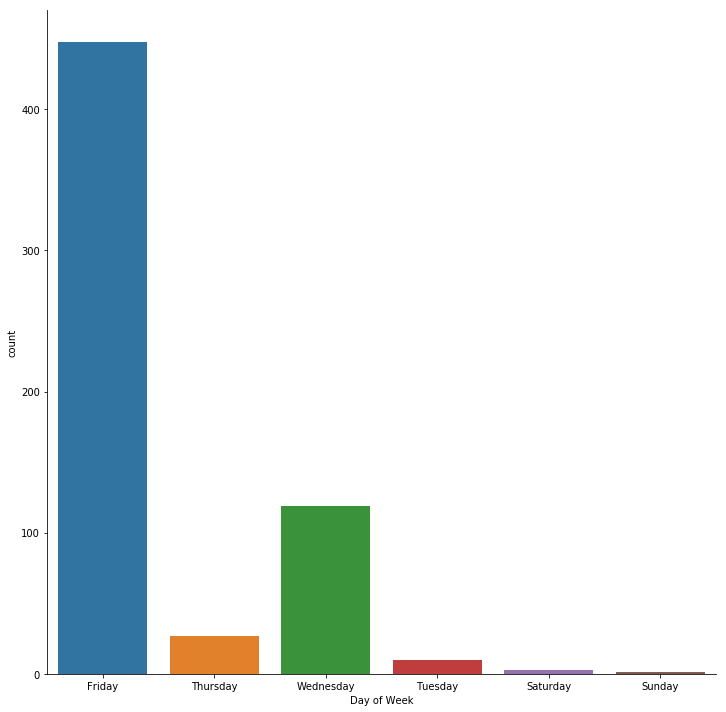

In [9]:
vis1 = sns.factorplot(data=mov, x="Day of Week", kind ="count",size=10 )

In [15]:
mov.Studio.unique()
len(mov.Studio.unique())

36

In [14]:
mov.Genre.unique()
len(mov.Genre.unique())

15

In [44]:
#This is one way of doing this
#mov2 = mov[(mov.Studio == "Fox")|(mov.Studio == "WB")| (mov.Studio == "")|(mov.Studio == "")|(mov.Studio == "")|(mov.Studio == "")]

studio_filters = ["Buena Vista Studios", "Fox", "Paramount Pictures", "Sony", "Universal", "WB"]
genre_filters = ["action", "adventure", "animation", "comedy", "drama"]

mov3 = mov[mov.Studio.isin(studio_filters)]
mov4 = mov3[mov.Genre.isin(genre_filters)]

In [45]:
mov3.Studio.unique()

array(['Buena Vista Studios', 'Sony', 'Universal', 'Paramount Pictures',
       'WB', 'Fox'], dtype=object)

In [46]:
mov4.Genre.unique()

array(['action', 'comedy', 'adventure', 'animation', 'drama'],
      dtype=object)

In [47]:
mov4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 606
Data columns (total 18 columns):
Day of Week               423 non-null object
Director                  423 non-null object
Genre                     423 non-null object
Movie Title               423 non-null object
Release Date              423 non-null object
Studio                    423 non-null object
Adjusted Gross ($mill)    423 non-null object
Budget ($mill)            423 non-null float64
Gross ($mill)             423 non-null object
IMDb Rating               423 non-null float64
MovieLens Rating          423 non-null float64
Overseas ($mill)          423 non-null object
Overseas%                 423 non-null float64
Profit ($mill)            423 non-null object
Profit%                   423 non-null float64
Runtime (min)             423 non-null int64
US ($mill)                423 non-null float64
Gross % US                423 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 62.8+ 

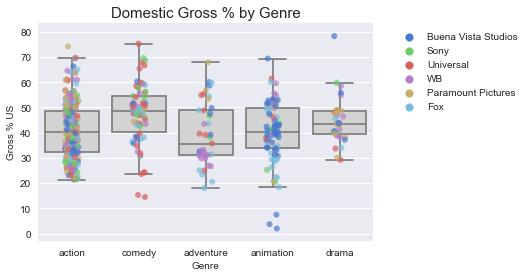

In [50]:
sns.set(style="darkgrid", palette = "muted", color_codes=True)

ax = sns.boxplot(data=mov4, x="Genre", y="Gross % US",orient="v", color="lightgray", showfliers=False)
#plt.setp(ax.artists, alpha=0.5)

sns.stripplot(x="Genre", y="Gross % US", data=mov4, jitter=True, size=6, linewidth = 0,hue="Studio",alpha=0.7)

ax.axes.set_title("Domestic Gross % by Genre", fontsize=15,)
ax.set_xlabel("Genre", fontsize = 10 )
ax.set_ylabel("Gross % US", fontsize = 10 )

ax.legend(bbox_to_anchor = (1.05,1), loc=2)